# 1. Latar Belakang

Perkembangan bisnis ritel saat ini menuntut perusahaan untuk mampu memahami perilaku pelanggan secara mendalam. Data transaksi yang dikumpulkan oleh supermarket mencerminkan aktivitas belanja pelanggan yang dapat diolah untuk menggali informasi penting, seperti preferensi produk, waktu pembelian favorit, dan efektivitas cabang. Dengan menganalisis data pelanggan secara sistematis, supermarket dapat menyusun strategi pemasaran yang lebih tepat sasaran, meningkatkan pengalaman pelanggan, serta memaksimalkan keuntungan. Oleh karena itu, diperlukan analisis data pelanggan secara menyeluruh sebagai dasar pengambilan keputusan bisnis berbasis data.

# 2. Pernyataan Masalah

Meskipun supermarket telah mengumpulkan berbagai data pelanggan, namun belum diketahui secara jelas:

1. Siapa segmen pelanggan utama berdasarkan demografi seperti usia, pendidikan, dan status pernikahan?

2. Produk atau kategori mana yang paling banyak dibeli dan memberikan kontribusi terbesar terhadap total belanja?

3. Bagaimana pengaruh karakteristik pelanggan (seperti pendapatan dan jumlah anak) terhadap pengeluaran mereka?

4. Seberapa efektif kampanye pemasaran yang telah dijalankan selama ini?

5. Faktor apa saja yang memengaruhi pelanggan dalam memberikan respons terhadap promosi?

# 3. Data

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3.1 Load Dataset

In [2]:
df = pd.read_csv("Supermarket Customers.csv", delimiter="\t")

In [3]:
# Menampilkan 5 data teratas
print("5 Data Teratas:")
display(df.head())

print("5 Data Terbawah:")
display(df.tail())

print("5 Sample Data Acak")
display(df.sample(5))

5 Data Teratas:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


5 Data Terbawah:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


5 Sample Data Acak


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1024,4240,1978,Graduation,Married,17345.0,1,0,03-11-2012,79,4,...,8,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
1507,7706,1975,2n Cycle,Together,46772.0,0,1,07-11-2012,88,350,...,8,1,0,0,0,0,0,3,11,0
2130,3006,1976,Graduation,Divorced,30992.0,1,0,22-04-2013,83,17,...,7,0,0,0,0,0,0,3,11,0
1954,5626,1964,PhD,Single,61798.0,0,0,23-11-2013,13,338,...,4,0,0,0,0,0,0,3,11,0


## 3.2 Data Understanding

### Menampilkan informasi struktur dataset

In [4]:
print("\nInformasi Umum Dataset:")
df.info()


Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurch

### Deskriptif Statistik

In [5]:
display(df.describe().transpose(), df.describe(include='object')) 

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


### Cek data duplikat

In [6]:
# Melihat data duplikat
df[df.duplicated()].shape

(0, 29)

### Cek Missing Values

In [7]:
# Melihat jumlah nilai kosong per kolom
print("\nJumlah Nilai Kosong per Kolom:")
display(df.isnull().sum())


Jumlah Nilai Kosong per Kolom:


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

#### Missing values pd Kolom Income 

In [8]:
# Menampilkan baris dengan nilai kosong di kolom 'Income'
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


### Tipe data per kolom

In [9]:
# Melihat tipe data per kolom
print("\nTipe Data Tiap Kolom:")
display(df.dtypes)


Tipe Data Tiap Kolom:


ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

### Nilai unik setiap kolom

In [10]:
# Cek nilai unik setiap kolom (tampilkan 10 setiap kolom)
for col in df.columns:
    print(f"{col}: {df[col].unique()[:10]}")

ID: [5524 2174 4141 6182 5324 7446  965 6177 4855 5899]
Year_Birth: [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950]
Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Income: [58138. 46344. 71613. 26646. 58293. 62513. 55635. 33454. 30351.  5648.]
Kidhome: [0 1 2]
Teenhome: [0 1 2]
Dt_Customer: ['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014']
Recency: [58 38 26 94 16 34 32 19 68 11]
MntWines: [635  11 426 173 520 235  76  14  28   5]
MntFruits: [88  1 49  4 43 42 65 10  0  5]
MntMeatProducts: [546   6 127  20 118  98 164  56  24  11]
MntFishProducts: [172   2 111  10  46   0  50   3   1  11]
MntSweetProducts: [ 88   1  21   3  27  42  49   2 112   5]
MntGoldProds: [88  6 42  5 15 14 27 23  2 13]
NumDealsPurchases: [ 3  2  1  5  4 15  7  0  6  9]
NumWebPurchases: [ 8  1  2  5  6  7  4  3 11  0]
NumCatal

### Kolom tambahan

- Mengapa perlu menambahkan kolom `Age` ?

karena pada dataset hanya memiliki `Year_Birth` pelanggan, jika ingin menganalisis segmen umur maka memerlukan umur pelanggan saat ini.

- Manfaat kolom `Age`:

1. Bisa membandingkan perilaku belanja antara pelanggan muda dan tua,
2. Mengetahui apakah umur memengaruhi pengeluaran, respons promosi, atau preferensi produk,
3. Bisa membuat segmentasi pelanggan, misalnya: remaja, dewasa muda, orang tua.

In [11]:
# Membuat kolom tambahan: Umur pelanggan
from datetime import datetime
df['Age'] = datetime.now().year - df['Year_Birth']

- Mengapa perlu menambahkan kolom `Total_Spending` ?

karena pada dataset, pengeluaran pelanggan banyak tersebar di banyak kolom, yaitu `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`,`MntSweetProducts`,`MntGoldProds`. Jadi kita belum tahu berapa total pengeluaran setiap pelanggan secara keseluruhan.

- Manfaat kolom `Total_Spending`:
1. Mengetahui pelanggan yang melakukan pembelanjaan terbesar (top spender),
2. Mengukur hubungan antara pendapatan dan pengeluaran,
3. Digunakan untuk analisis loyalitas atau retensi pelanggan.

In [12]:
# Membuat kolom tambahan: Total Spending
produk_cols = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts',
               'MntSweetProducts','MntGoldProds']
df['Total_Spending'] = df[produk_cols].sum(axis=1)

- menambahkan kolom `Total_AccCmp`
diperoleh dari menjumlahkan `AcceptedCmp1`  sampai `AcceptedCmp4` dan `Response`

In [13]:
df["Total_AccCmp"] = df["AcceptedCmp1"] + df["AcceptedCmp2"] + df["AcceptedCmp3"] + df["AcceptedCmp4"] + df["AcceptedCmp5"] + df["Response"]


In [14]:
# Menampilkan 5 data setelah menambahkan kolom baru
print("\n5 Data Setelah Menambahkan Kolom Baru:")
df.head(5)


5 Data Setelah Menambahkan Kolom Baru:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Spending,Total_AccCmp
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,68,1617,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,71,27,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,60,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,41,53,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,44,422,0


1. Struktur Kolom

`ID` (Integer) = ID unik pelanggan

`Year_Birth` (Integer) = Tahun kelahiran pelanggan (bisa dihitung umur)

`Education` (Kategori) = Tingkat pendidikan (Basic, Graduation, Master, PhD, dsb.)

`Marital_Status` (Kategori) = Status pernikahan (Single, Married, Together, dsb.)

`Income` (Numerik) = Pendapatan tahunan pelanggan (dalam angka)

`Kidhome` (Integer) = Jumlah anak di rumah (yang berusia anak kecil)

`Teenhome` (Integer) = Jumlah anak remaja di rumah (yang berusia remaja)

`Dt_Customer` (Tanggal) = Tanggal pertama kali menjadi pelanggan

`Recency` (Integer) = Hari sejak pembelian terakhir

`MntWines`, `MntFruits`, ..., `MntGoldProds` (Integer) = Pengeluaran (dalam satuan mata uang) per kategori produk

`NumDealsPurchases` (Integer) = Jumlah pembelian dengan diskon

`NumWebPurchases` (Integer) = Jumlah pembelian via website

`NumCatalogPurchases`(Integer) = Jumlah pembelian via katalog

`NumStorePurchases` (Integer) = Jumlah pembelian langsung di toko

`NumWebVisitsMonth` (Integer) = Jumlah kunjungan ke website per bulan

`AcceptedCmp1–5` (Biner (0/1)) = Apakah pelanggan merespon kampanye marketing tertentu

`Complain`(Biner (0/1)) = Apakah pelanggan pernah mengeluh

`Z_CostContact` (Konstanta) = tidak terkait dengan kolom lainnya, sehingga dapat dihapus (semua bernilai sama)

`Z_Revenue` (Konstanta) = tidak terkait dengan kolom lainnya, sehingga dapat dihapus (semua bernilai sama)

`Response` (Biner (0/1)) = Apakah pelanggan merespons kampanye terakhir

2. Identifikasi Kolom penting untuk Analisis:
- Segmentasi pelanggan → Gunakan: `Year_Birth`, `Education`, `Income`, `Marital_Status`, `Kidhome`, `Teenhome`, serta menambahkan kolom `Age`.
- Analisis pembelian → Gunakan: `MntWines`, `MntFruits`, ..., `MntGoldProds`, `Num*Purchases`.
- Analisis perilaku online/offline → Gunakan: `NumWebPurchases`, `NumStorePurchases`, `NumWebVisitsMonth`.
- Efektivitas kampanye → Gunakan: `AcceptedCmp1–5`, `Response`.
- Pengeluaran total → Bisa dibuat variabel baru: `Total_Spending` = `MntWines` + ... + `MntGoldProds`.

3. Yang perlu diperhatikan:
- Kolom `ID` sebaiknya diubah menjadi tipe string karena tidak ada perhitungan yang dilakukan.
- Kolom `Dt_Customer` masih berbentuk string → diubah ke tipe datetime.
- Kolom `Income` memiliki 24 nilai kosong → perlu ditangani.
- Kolom `Z_CostContact` dan `Z_Revenue` → tidak terkait dengan kolom lainnya, sehingga dapat dihapus.
- Menghapus usia pelanggan diatas 100 tahun dan income yang bernilai 66666.

# 4 Data Cleaning

In [27]:
# Membuat salinan dari data asli
df_clean = df.copy()

### Ubah datatype

In [28]:
# Mengubah tipe kolom ID ke string
df_clean["ID"] = df_clean["ID"].astype(str)

In [29]:
# Mengubah kolom 'Dt_Customer' dari string ke datetime
df_clean['Dt_Customer'] = pd.to_datetime(df_clean['Dt_Customer'], format='%d-%m-%Y')

### Menghapus Kolom

In [30]:
# Menghapus kolom ('Z_CostContact' dan 'Z_Revenue')
df_clean.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

### Nilai Unik

In [33]:
# Ubah '2n Cycle' menjadi master
df_clean["Education"].replace("2n Cycle", "Master", inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_9320\1235737353.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean["Education"].replace("2n Cycle", "Master", inplace=True)


In [34]:
df_clean["Education"].value_counts()

Education
Graduation    1127
Master         571
PhD            485
Basic           54
Name: count, dtype: int64

In [35]:
# Mapping manual
mapping_marital = {
    'Married': 'Married',
    'Together': 'Married',
    'Single': 'Single',
    'Divorced': 'Single',
    'Widow': 'Other',
    'Alone': 'Single',
    'Absurd': 'Other',
    'YOLO': 'Other'
}

df_clean["Marital_Status"] = df_clean["Marital_Status"].replace(mapping_marital)



In [36]:
df_clean["Marital_Status"].value_counts()

Marital_Status
Married    1443
Single      713
Other        81
Name: count, dtype: int64

### Menangani outlier

In [31]:
# Menghapus usia pelanggan lebih dari 100 tahun
df_clean = df_clean[df_clean["Age"] <= 100]

<Axes: xlabel='Income'>

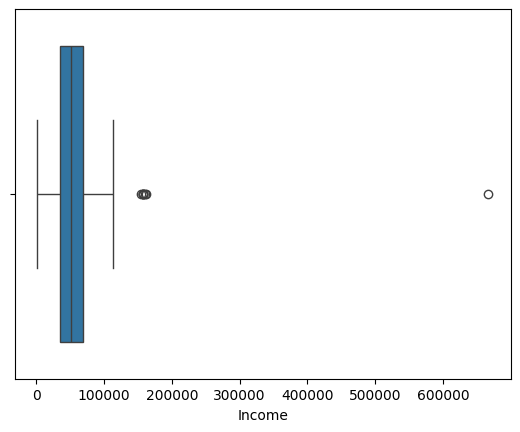

In [37]:
sns.boxplot(data=df, x="Income")

In [38]:
# Calculate the IQR for the column
Q1 = df_clean["Income"].quantile(0.25)
Q3 = df_clean["Income"].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_clean[(df_clean["Income"] < lower_bound) | (df_clean["Income"] > upper_bound)]
outliers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spending,Total_AccCmp
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,0,0,52,1608,0
617,1503,1976,PhD,Married,162397.0,1,1,2013-06-03,31,85,...,0,0,0,0,0,0,0,49,107,0
655,5555,1975,Graduation,Single,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,0,0,0,50,6,0
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,0,0,0,43,1717,0
1300,5336,1971,Master,Married,157733.0,1,0,2013-06-04,37,39,...,0,0,0,0,0,0,0,54,59,0
1653,4931,1977,Graduation,Married,157146.0,0,0,2013-04-29,13,1,...,0,0,0,0,0,0,0,48,1730,0
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,0,0,76,8,0
2233,9432,1977,Graduation,Married,666666.0,1,0,2013-06-02,23,9,...,0,0,0,0,0,0,0,48,62,0


In [40]:
df_clean = df_clean[~((df_clean["Income"] < lower_bound) | (df_clean["Income"] > upper_bound))]

<Axes: xlabel='Income', ylabel='Count'>

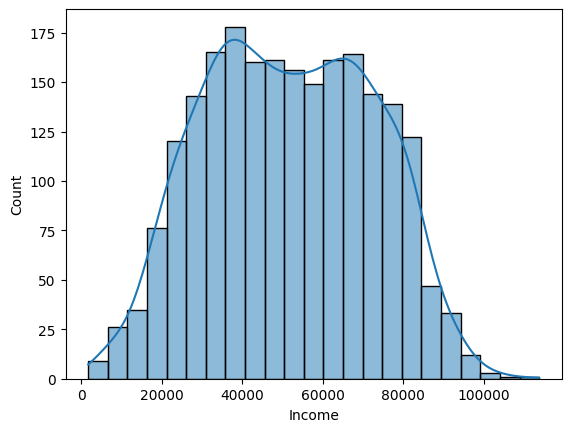

In [41]:
sns.histplot(data=df_clean, x="Income", kde=True)

### Menangani Missing Value

Berdasarkan karakteristik data pelanggan, missing values pada kolom `Income` adalah: MNAR (Missing Not At Random).

Alasan:
- Data pendapatan (Income) adalah data sensitif
- Orang dengan pendapatan terlalu rendah atau terlalu tinggi bisa saja sengaja tidak mengisi
- Jadi, hilangnya data itu berhubungan dengan nilai yang hilang itu sendiri (pendapatannya)

Maka dari itu nilai yang hilang pada pendapatan akan kita isi berdasarkan median pendidikan, karena biasanya semakin tinggi tingkat pendidikan seseorang, semakin tinggi pendapatannya.

In [42]:
df_clean.groupby('Education')[['Income']].median()

,Income
Education,
Basic,20744.0
Graduation,51948.0
Master,49588.5
PhD,55005.0


In [43]:
df_clean["Income"] = df_clean["Income"].fillna(df_clean.groupby("Education")["Income"].transform("median"))

### Menyimpan data clean

In [45]:
# Melihat hasil pembersihan data
print("Jumlah Nilai Kosong Setelah Dibersihkan:")
print(df_clean.isnull().sum())

Jumlah Nilai Kosong Setelah Dibersihkan:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Age                    0
Total_Spending         0
Total_AccCmp           0
dtype: int64


In [46]:
print("\nTipe Data Setelah Cleaning:")
print(df_clean.dtypes)


Tipe Data Setelah Cleaning:
ID                             object
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain             

In [47]:
# Menampilkan 5 data teratas setelah cleaning
print("\n5 Data Teratas Setelah Melakukan Data Cleaning:")
display(df_clean.head())


5 Data Teratas Setelah Melakukan Data Cleaning:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spending,Total_AccCmp
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,1,68,1617,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,0,71,27,0
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,0,60,776,0
3,6182,1984,Graduation,Married,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,0,41,53,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,0,44,422,0


In [48]:
df_clean.value_counts()

ID     Year_Birth  Education   Marital_Status  Income   Kidhome  Teenhome  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  Total_Spending  Total_AccCmp
0      1985        Graduation  Married         70951.0  0        0         2013-05-04   66       239       10         554              254              87                54            1                  3                4                    9                  1                  0             0             0             0             0             0         0         40   1198            0               1
1      1961        Graduation  Single          57091.0  0        0         2014-06-15   0        464       5          64               7                0                 37            1    

In [58]:
df_clean.to_excel("Supermarket_cleaned.xlsx", index=False)

# Data Analysis

## 1. Eksplorasi segmen pelanggan berdasarkan demografi

Text(0.5, 0, 'Umur')

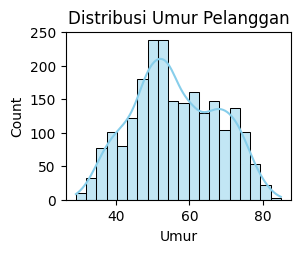

In [49]:
# Distribusi Umur
plt.subplot(2, 2, 1)
sns.histplot(df_clean['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Umur Pelanggan')
plt.xlabel('Umur')

Hasil :
- Umur terbanyak ada di kisaran 50–60 tahun
- Sedikit yang di bawah 35 atau di atas 75

Mayoritas pelanggan adalah orang dewasa paruh baya, artinya mereka sudah stabil secara finansial dan cenderung loyal.
Promosi bisa dilakukan melalui pendekatan kenyamanan, kemudahan, dan kualitas layanan.

([0, 1, 2, 3],
 [Text(0, 0, 'Graduation'),
  Text(1, 0, 'Master'),
  Text(2, 0, 'PhD'),
  Text(3, 0, 'Basic')])

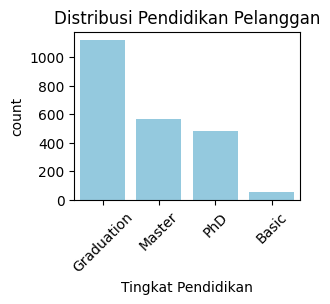

In [50]:
# Distribusi Pendidikan
plt.subplot(2, 2, 2)
sns.countplot(data=df_clean, x='Education', order=df_clean['Education'].value_counts().index, color='skyblue')
plt.title('Distribusi Pendidikan Pelanggan')
plt.xlabel('Tingkat Pendidikan')
plt.xticks(rotation=45)

Hasil :
- Pendidikan paling banyak: Graduation (S1)
- Diikuti oleh Master (S2) dan PhD (S3)
- Basic education sangat sedikit

Pelanggan terbanyak yaitu berpendidikan tinggi, artinya mereka cenderung: Responsif terhadap informasi yang logis dan rasional, Tertarik pada value bukan sekadar harga. Jadi, konten promosi sebaiknya dibuat profesional dan bernilai.

([0, 1, 2], [Text(0, 0, 'Married'), Text(1, 0, 'Single'), Text(2, 0, 'Other')])

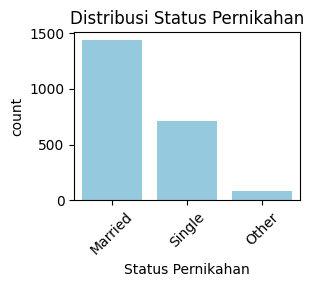

In [51]:
# Distribusi Status Pernikahan
plt.subplot(2, 2, 3)
sns.countplot(data=df_clean, x='Marital_Status', order=df_clean['Marital_Status'].value_counts().index, color='skyblue')
plt.title('Distribusi Status Pernikahan')
plt.xlabel('Status Pernikahan')
plt.xticks(rotation=45)

Hasil :
- Married = paling banyak
- Single = sedang
- Other = paling sedikit

Mayoritas pelanggan adalah yang sudah menikah, jadi strategi komunikasi promosi bisa mempertimbangkan pendekatan keluarga atau pasangan. Namun, pelanggan single juga cukup banyak, bisa jadi target untuk promosi yang lebih individual/personal.

Text(0.5, 0, 'Pendapatan')

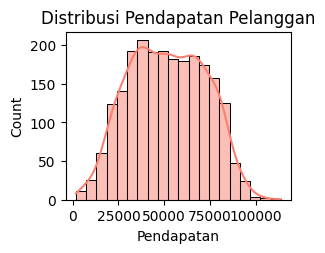

In [53]:
# Distribusi Pendapatan
plt.subplot(2, 2, 4)
sns.histplot(df_clean['Income'], bins=20, kde=True, color='salmon')
plt.title('Distribusi Pendapatan Pelanggan')
plt.xlabel('Pendapatan')

Hasil :
- Pendapatan paling banyak berada di kisaran 30.000 – 70.000
- Ada sedikit pelanggan yang berpendapatan sangat tinggi (80.000-100.000)

Sebagian besar pelanggan punya pendapatan menengah, jadi promosi berbasis harga, diskon, atau paket bundling akan lebih menarik bagi mereka. Promosi eksklusif bisa dibuat khusus untuk pelanggan dengan pendapatan tinggi.

## 2. Produk yang Paling Banyak Dibeli dan Memberikan Kontribusi Terbesar terhadap Total Belanja

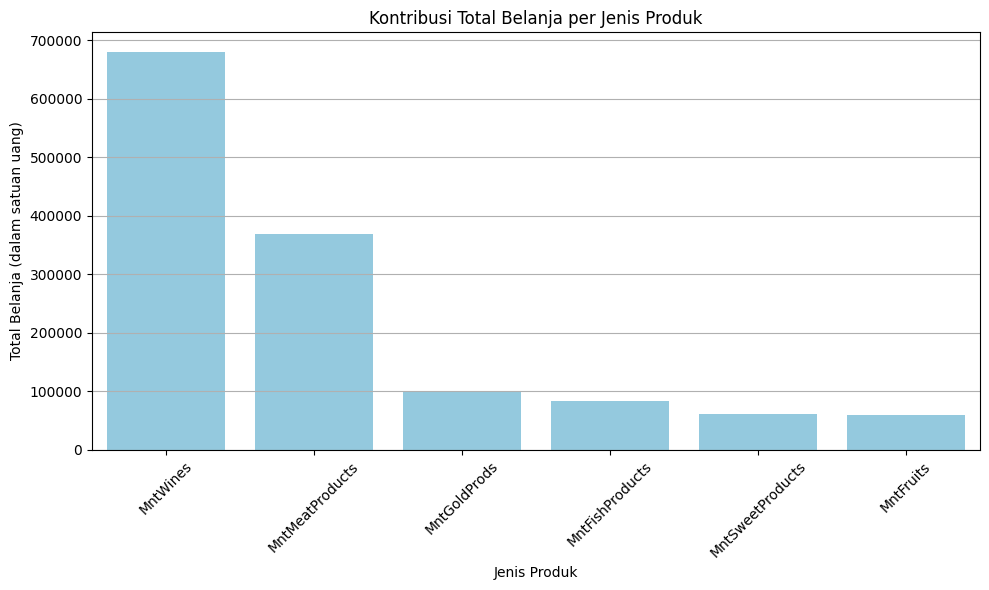

In [54]:
# Hitung total belanja per jenis produk
produk_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 
               'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

produk_total = df_clean[produk_cols].sum().sort_values(ascending=False)

# Buat barplot kontribusi produk terhadap total belanja
plt.figure(figsize=(10,6))
sns.barplot(x=produk_total.index, y=produk_total.values, color='skyblue')
plt.title('Kontribusi Total Belanja per Jenis Produk')
plt.ylabel('Total Belanja (dalam satuan uang)')
plt.xlabel('Jenis Produk')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Hasil:

Produk Anggur (MntWines) menjadi kategori paling tinggi dalam total belanja, bahkan jauh melampaui kategori lainnya. Artinya pelanggan memiliki preferensi yang kuat terhadap produk premium atau lifestyle, seperti anggur.

Hal ini bisa dimanfaatkan untuk melakukan strategi seperti:
- Promosi wine pairing
- Bundle wine + makanan
- Loyalty program khusus pembeli wine

## 3. Apakah pendapatan dan jumlah anak bisa memengaruhi pengeluaran pelanggan?

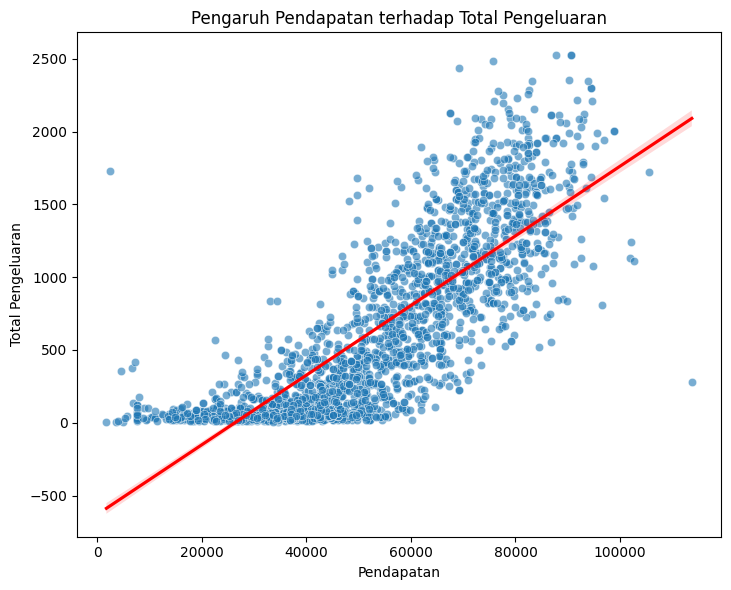

In [55]:
plt.figure(figsize=(14, 6))

# Korelasi antara Pendapatan dan Total Pengeluaran
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_clean, x='Income', y='Total_Spending', alpha=0.6)
sns.regplot(data=df_clean, x='Income', y='Total_Spending', scatter=False, color='red')
plt.title('Pengaruh Pendapatan terhadap Total Pengeluaran')
plt.xlabel('Pendapatan')
plt.ylabel('Total Pengeluaran')

plt.tight_layout()
plt.show()

Hasil:

a. Semakin Tinggi Pendapatan, Semakin Tinggi Pengeluaran
Grafik ini menunjukkan korelasi positif yang jelas: pelanggan dengan pendapatan lebih tinggi cenderung membelanjakan lebih banyak. 
Artinya: Pelanggan yang mempunyai pendapatan tinggi merupakan segmen bernilai strategis, mereka memiliki kemampuan dan kecenderungan untuk belanja lebih besar, dan promosi berbasis value (bukan sekadar harga murah) lebih cocok untuk segmen ini.

b.  — artinya: Tidak semua orang kaya belanja besSemakin tinggi pendapatannya, variasi pengeluaran juga makin besarar, tapi semakin tinggi income, peluang belanja besar juga semakin besar.

c. Ada Pelanggan Pendapatan Rendah tapi Pengeluaran Tinggi
Terdapat beberapa titik di area pengeluaran tinggi tapi pendapatan rendah.
Kemungkinan penyebab: Pelanggan ini belanja untuk orang lain (kelompok) atau Belanja musiman (contoh: stok, diskon besar).

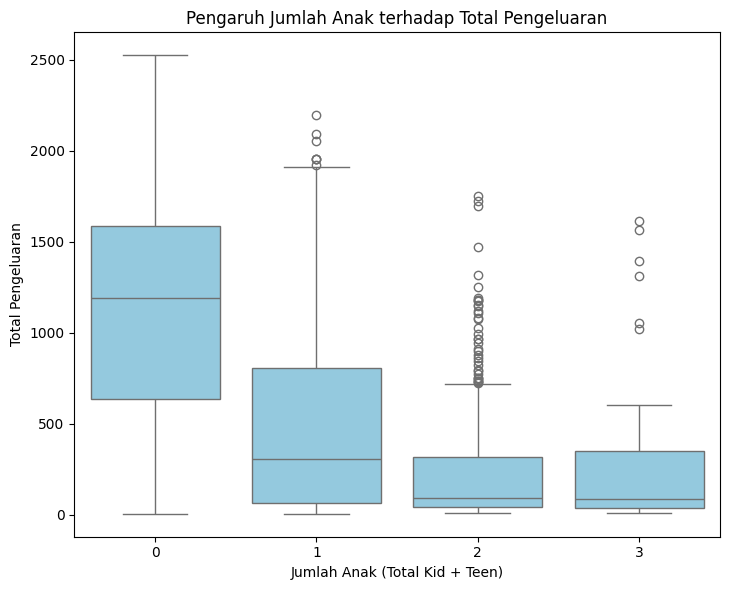

In [36]:
plt.figure(figsize=(14, 6))

# Jumlah Anak (Kidhome + Teenhome) vs Total Pengeluaran
df_clean['Total_Kids'] = df_clean['Kidhome'] + df_clean['Teenhome']
plt.subplot(1, 2, 2)
sns.boxplot(data=df_clean, x='Total_Kids', y='Total_Spending', color='skyblue')
plt.title('Pengaruh Jumlah Anak terhadap Total Pengeluaran')
plt.xlabel('Jumlah Anak (Total Kid + Teen)')
plt.ylabel('Total Pengeluaran')

plt.tight_layout()
plt.show()

Hasil:

a. Pelanggan yang tidak mempunyai anak memiliki median dan sebaran pengeluaran paling tinggi secara signifikan dibanding kelompok lainnya. Artinya: Pelanggan tanpa tanggungan anak lebih leluasa membelanjakan uangnya, kemungkinan untuk gaya hidup, hiburan, atau produk premium. Mereka cenderung spending-oriented, karena tidak terbebani biaya lain.

b. Pelanggan yang mempunyai 1 - 3 anak, median dan sebaran pengeluarannya justru makin rendah. Artinya: Pelanggan dengan lebih banyak anak cenderung lebih berhati-hati dan hemat, mungkin karena harus membagi keuangan untuk kebutuhan keluarga.

## 4. Faktor apa saja yang memengaruhi pelanggan dalam memberikan respons terhadap promosi ?

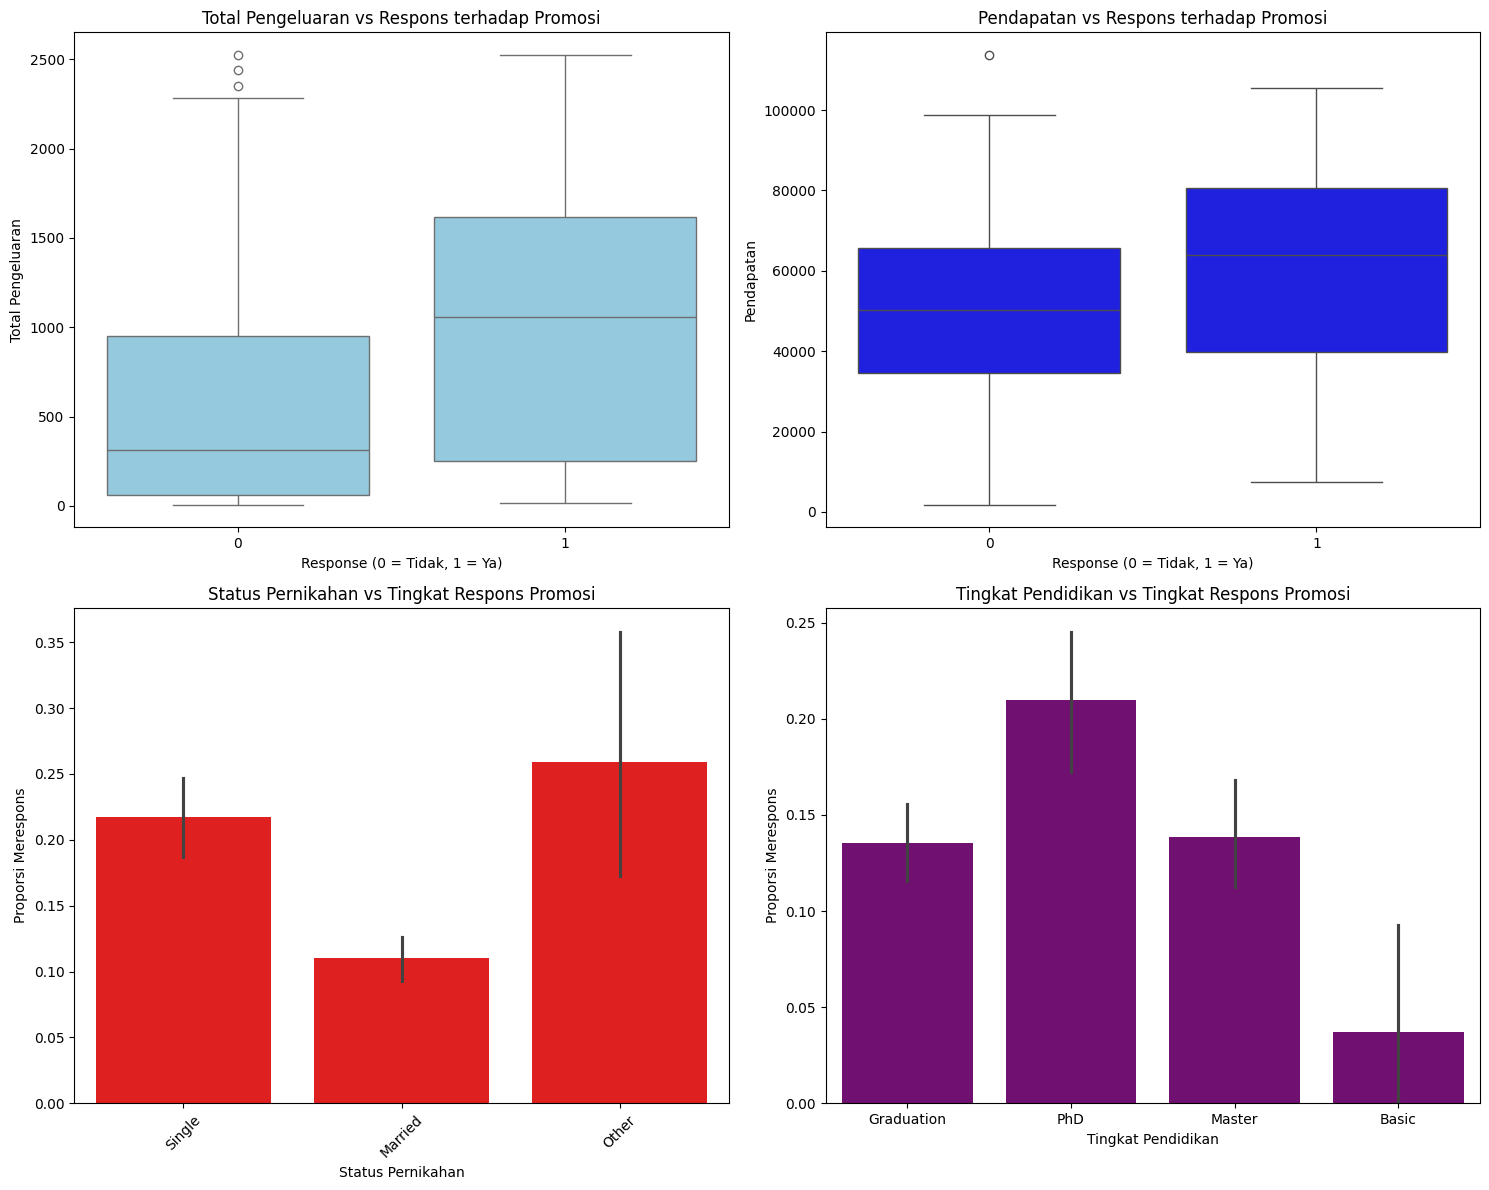

In [56]:
# Eksplorasi faktor yang mempengaruhi kolom 'Response'

plt.figure(figsize=(15, 12))

# 1. Rata-rata pengeluaran vs Respons
plt.subplot(2, 2, 1)
sns.boxplot(data=df_clean, x='Response', y='Total_Spending', color='skyblue')
plt.title('Total Pengeluaran vs Respons terhadap Promosi')
plt.xlabel('Response (0 = Tidak, 1 = Ya)')
plt.ylabel('Total Pengeluaran')

# 2. Pendapatan vs Respons
plt.subplot(2, 2, 2)
sns.boxplot(data=df_clean, x='Response', y='Income', color='blue')
plt.title('Pendapatan vs Respons terhadap Promosi')
plt.xlabel('Response (0 = Tidak, 1 = Ya)')
plt.ylabel('Pendapatan')

# 3. Status Pernikahan vs Respons
plt.subplot(2, 2, 3)
sns.barplot(data=df_clean, x='Marital_Status', y='Response', estimator=lambda x: sum(x)/len(x), color='red')
plt.title('Status Pernikahan vs Tingkat Respons Promosi')
plt.ylabel('Proporsi Merespons')
plt.xlabel('Status Pernikahan')
plt.xticks(rotation=45)

# 4. Pendidikan vs Respons
plt.subplot(2, 2, 4)
sns.barplot(data=df_clean, x='Education', y='Response', estimator=lambda x: sum(x)/len(x), color='purple')
plt.title('Tingkat Pendidikan vs Tingkat Respons Promosi')
plt.ylabel('Proporsi Merespons')
plt.xlabel('Tingkat Pendidikan')

plt.tight_layout()
plt.show()


Hasil:

1. Total Pengeluaran vs Respons
- Pelanggan yang merespons promosi (Response = 1) umumnya memiliki total pengeluaran yang lebih tinggi, artinya pelanggan yang memberikan respons terhadap promosi (Response = 1) terlihat memiliki distribusi total pengeluaran yang lebih tinggi dibandingkan dengan pelanggan yang tidak merespons. Median pengeluaran kelompok ini secara konsisten berada di atas kelompok non-responsif.

2. Pendapatan vs Respons
- Tidak ada perbedaan yang terlalu mencolok, namun distribusi pendapatan pelanggan yang merespons lebih merata.Artinya: pendapatan bukan satu-satunya penentu, pelanggan dari berbagai kelas ekonomi bisa tertarik pada promosi
- Berdasarkan persebaran pendapatan, pelanggan yang merespons dan tidak merespons promosi memiliki rentang distribusi yang hampir serupa. Tidak terdapat perbedaan mencolok dari sisi pendapatan.

3. Status Pernikahan vs Respons
- Proporsi respons tertinggi ditemukan pada pelanggan dengan status Single dan kategori Other. Sementara itu, pelanggan Married memiliki tingkat respons yang paling rendah.
- Promosi umum saat ini lebih efektif pada pelanggan yang belum memiliki tanggungan atau keputusan bersama. Untuk pelanggan menikah, bisa dipertimbangkan pendekatan emosional, paket keluarga, atau promosi bersama pasangan.
- Bisa jadi karena pelanggan yang belum menikah lebih terbuka terhadap penawaran atau gaya hidup konsumtif

4. Pendidikan vs Respons
- Pelanggan dengan pendidikan PhD dan Master cenderung memiliki tingkat respons lebih tinggi
- artinya Pelanggan dengan latar belakang pendidikan PhD dan Master menunjukkan tingkat respons tertinggi terhadap promosi, sedangkan pelanggan dengan latar belakang pendidikan dasar (Basic) memiliki tingkat respons terendah.
- Kelompok berpendidikan tinggi kemungkinan lebih menyadari nilai dan urgensi penawaran yang diberikan. Hal ini membuka peluang untuk mengembangkan kampanye promosi yang lebih informatif dan berbasis data.

## 5. Apakah promosi yang telah dijalankan sudah efektif ?

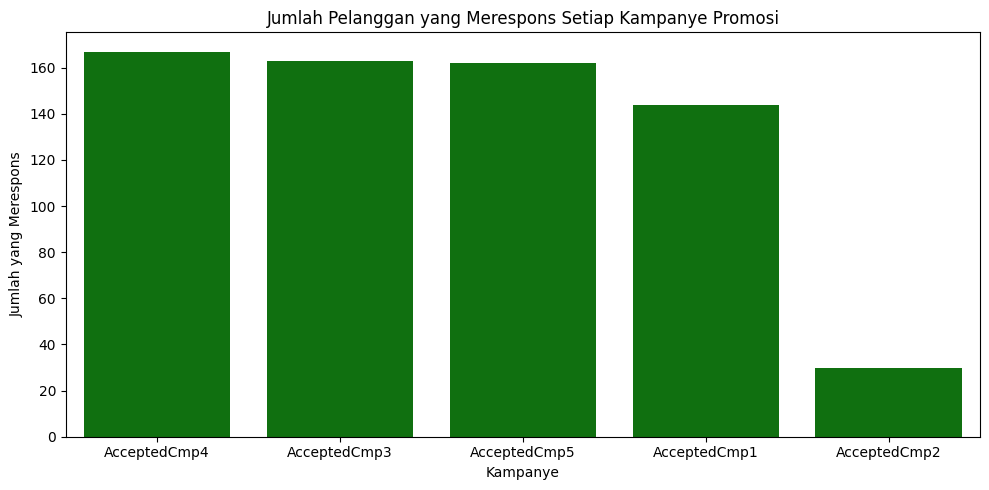

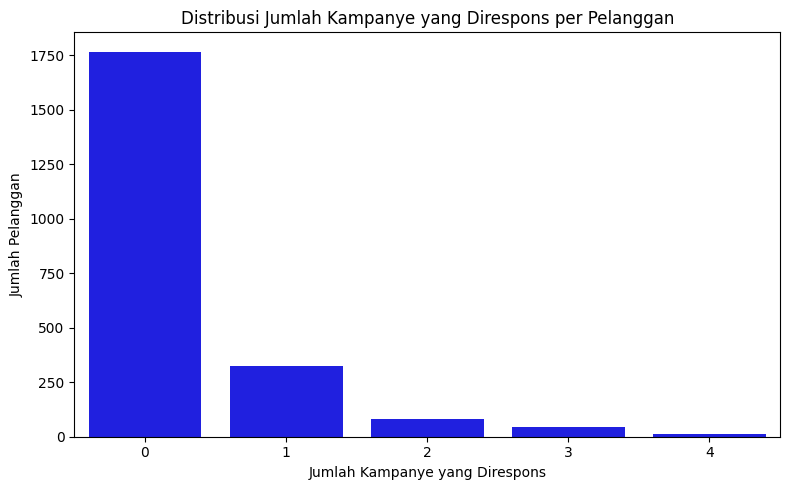

In [57]:
# Gabungkan semua kampanye promosi ke dalam satu kolom total kampanye yang diterima
kampanye_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df_clean['Total_Accepted_Campaigns'] = df_clean[kampanye_cols].sum(axis=1)

# Plot jumlah pelanggan yang menerima tiap kampanye
kampanye_sum = df_clean[kampanye_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=kampanye_sum.index, y=kampanye_sum.values, color='green')
plt.title('Jumlah Pelanggan yang Merespons Setiap Kampanye Promosi')
plt.xlabel('Kampanye')
plt.ylabel('Jumlah yang Merespons')
plt.tight_layout()
plt.show()

# Plot distribusi jumlah kampanye yang diterima pelanggan
plt.figure(figsize=(8, 5))
sns.countplot(data=df_clean, x='Total_Accepted_Campaigns', color='blue')
plt.title('Distribusi Jumlah Kampanye yang Direspons per Pelanggan')
plt.xlabel('Jumlah Kampanye yang Direspons')
plt.ylabel('Jumlah Pelanggan')
plt.tight_layout()
plt.show()


Hasil:

a. Jumlah Pelanggan yang Merespons Setiap Kampanye Promosi
- Kampanye Cmp4 adalah yang paling berhasil, disusul Cmp3 dan Cmp5 yang memiliki jumlah respons hampir sama. Cmp4 kemungkinan punya kombinasi waktu, produk, dan pesan promosi yang sangat sesuai dengan minat pelanggan.
- Cmp2 adalah kampanye yang paling tidak efektif, hanya mendapatkan sekitar 30-an respons pelanggan—jauh tertinggal dibanding kampanye lainnya. Cmp2 perlu evaluasi total, karena performanya sangat rendah: bisa jadi promosinya kurang relevan, tampilannya kurang menarik, atau target market-nya tidak tepat.

b. Distribusi Jumlah Kampanye yang Direspons oleh Setiap Pelanggan
- Mayoritas pelanggan (lebih dari 1.700 orang) tidak merespons satu pun kampanye (jumlah = 0). Sebagian besar pelanggan tidak merasa tertarik atau tergerak dengan promosi yang diberikan.
- Hanya sebagian kecil yang merespons 1–2 kampanye, dan sangat sedikit yang konsisten merespons hingga 3 atau lebih. Ini menunjukkan adanya kesenjangan antara promosi yang ditawarkan dengan kebutuhan/ketertarikan pelanggan.

# Kesimpulan dan Rekomendasi

## Kesimpulan

1. Pelanggan dengan Pendapatan Tinggi Cenderung Belanja Lebih Banyak: Terdapat korelasi positif antara pendapatan dan total pengeluaran. Pelanggan berpendapatan tinggi cenderung menjadi pembelanja aktif dan loyal.

2. Pelanggan Tanpa Anak Menghabiskan Lebih Banyak Uang di Supermarket: Pelanggan yang tidak memiliki anak cenderung memiliki pengeluaran lebih tinggi dibanding yang memiliki 1–3 anak.

3. Produk Anggur dan Daging Mendominasi Total Penjualan: Produk MntWines dan MntMeatProducts menyumbang kontribusi tertinggi terhadap total belanja pelanggan, menunjukkan bahwa produk-produk lifestyle dan kebutuhan utama sangat diminati.

4. Pelanggan Berpendidikan Tinggi Lebih Responsif terhadap Promosi: Pelanggan dengan latar belakang pendidikan Master dan PhD menunjukkan tingkat respons yang lebih tinggi terhadap promosi dibanding pelanggan dengan pendidikan dasar.

5. Status Pernikahan Mempengaruhi Respons Promosi: Pelanggan single dan kategori "other" memiliki tingkat respons terhadap promosi yang lebih tinggi dibanding pelanggan yang sudah menikah.

## Rekomendasi

1. Segmentasi Pelanggan yang Lebih Cerdas dengan menerapkan strategi promosi berbasis segmentasi seperti:
- Income-based: eksklusif untuk high spender
- Family-oriented: bundling produk hemat untuk pelanggan dengan anak
- Lifestyle: produk premium untuk pelanggan tanpa anak

2. Personalisasi Promosi Berdasarkan Respons dengan lebih fokus mengadakan kampanye promosi kepada pelanggan yang terbukti responsif:
- Pelanggan dengan status single dan mempunyai pendidikan tinggi
- Gunakan email marketing, loyalty points, dan penawaran khusus

3. Dorong Produk Rendah Performa dengan melakukan Program Bundling, seperti buah dan permen yang kontribusinya kecil bisa dipromosikan melalui:
- Paket hemat
- Promo “beli 3 gratis 1”
- Cross-selling dengan produk favorit (contoh: wine + keju + buah)

4. Investasi pada Produk Premium dan Loyalty Program
- Produk seperti wine dan meat memiliki potensi margin tinggi
- Berikan apresiasi dan sistem loyalti untuk pelanggan besar agar tetap belanja secara konsisten

6. Optimalkan Penawaran Berdasarkan Siklus Hidup Pelanggan
- Gunakan analisis umur + jumlah anak untuk menawarkan produk yang relevan di tiap tahap kehidupan.